# numpyの導入

## 学ぶこと

- Numpy配列の作り方
- Numpy配列のデータ型
- データ型のキャスト


## NumPyとは

## NumPy配列の初期化

In [1]:
import numpy as np




In [10]:
d = list(range(5))
print(d) # Pythonのリスト

num_array = np.array(d)
print(num_array) # numpyの配列

[0, 1, 2, 3, 4]
[0 1 2 3 4]


## NumPy配列のインデックスによるアクセス



In [12]:
x = np.ones(5)
print(x)

[1. 1. 1. 1. 1.]


In [14]:
x[2] = 8
x

array([1., 1., 8., 1., 1.])

スライスを使った直接の代入も可能である．


In [15]:
x[:2] = 10
x

array([10., 10.,  8.,  1.,  1.])

リストのスライスを使った代入は，要素数を変える**黒魔術**であることに注意．

基本的には使わないこと. 

In [16]:
x = list(range(5))
x[1:4] = [-1, -1]
x

[0, -1, -1, 4]

numpyの配列はインプレイスな演算もサポートしている. 

In [18]:
x = np.arange(5)
x[:4] += 10
x[:2] *= 10
x

array([100, 110,  12,  13,   4])

## NumPy配列の計算

In [19]:
# 直接関数を適用することが可能
np.exp(np.arange(5))

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

## ベストプラクティス

上記のようにNumPy配列はループを使わない処理が可能である．
数値演算を高速化する場合には，ループ（ピュアなPython）に依存しないようにすることが重要. 


In [21]:
from mypy.mymodule import TimeExecute

In [23]:
x = list(range(int(1e7)))
with TimeExecute():
    for i in range(len(x)):
        x[i] *= 2
    

1,151.955 [msec]


In [24]:
x = list(range(int(1e7)))
with TimeExecute():
    x * 2

289.227 [msec]


## NumPy配列を簡単に呼び出す

よく使うのはコレらしい. 

- np.arange
- np.ones
- np.zeros
- np.ones_like
- np.zeros_like
- np.linspace
- np.random.rand
- np.random.randn
- np.full
- np.empty
- np.concatenate



In [29]:
a = np.arange(2)
b = np.arange(3, 5)
np.concatenate([a, b])

(array([0, 1, 3, 4]), array([0, 1, 3, 4]))

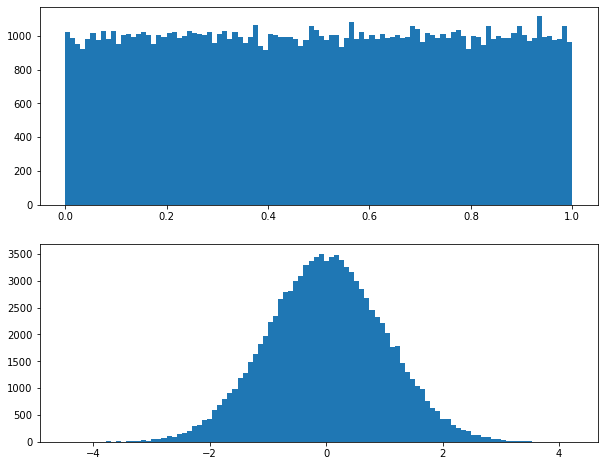

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10, 8))
ax  = fig.add_subplot(2, 1, 1)
ax.hist(np.random.rand(100000), bins = 100)
ax  = fig.add_subplot(2, 1, 2)
ax.hist(np.random.randn(100000), bins = 100)
plt.show()

In [38]:
np.full((3, 2), [3, 2])

array([[3, 2],
       [3, 2],
       [3, 2]])

In [39]:
# すべｔ同じ要素の時にもfullを使う
# np.ones(N) * aなどよりも早い
np.full((10,), 5)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [41]:
# 領域だけ確保の場合にもnp.zero等を使うより関数を使う. 
np.empty((3, 2))

array([[17.2, 17.2],
       [17.2, 17.2],
       [17.2, 24.2]])

## データ型


In [57]:
# データ型ごとのバイト数を確認
dtypes = [np.uint8, np.int32, np.float64, np.object, np.dtype("U10"), np.bool]
for dt in dtypes:
    x = np.ones(3, dtype = dt).tostring()
    print(dt, len(x) / 3)

<class 'numpy.uint8'> 1.0
<class 'numpy.int32'> 4.0
<class 'numpy.float64'> 8.0
<class 'object'> 8.0
>U10 40.0
<class 'bool'> 1.0


## ブーリアンマスク

NumPyの配列のスライスは，インデックスだけでなく，ブール型でも可能である. 


In [59]:
x = np.arange(5)
is_even = x % 2 == 0
x[is_even] += 10
x

array([10,  1, 12,  3, 14])

## キャスト

**astype**メソッドを使う. 


In [60]:
a = np.arange(10, dtype = np.int32)
a.astype(np.uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
a.astype(np.dtype("U10"))

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U10')

In [62]:
np.array(["10"]).astype(np.int32)

array([10])

## 演習問題

### question 01

In [65]:

import numpy as np

np.ones((3,))

array([1., 1., 1.])

In [66]:
np.zeros((7,))

array([0., 0., 0., 0., 0., 0., 0.])

### question 02

In [70]:
a = np.ones((3, ), dtype = np.int32)
print(a, a.dtype)

[1 1 1] int32


### question 03


In [71]:
x = np.zeros(5, dtype = np.int32)
x[len(x) // 2] += 1
x

array([0, 0, 1, 0, 0])

### question 04

In [82]:
x = np.empty(10, dtype = np.int32)
is_even = np.arange(len(x)) % 2 == 0
x[is_even] = 0
x[np.logical_not(is_even)] = 1
x

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

### question 06

In [85]:
N   = 100
ret = np.arange(1, N + 1, dtype = np.object)
is_fizz = ret % 3 == 0
is_buzz = ret % 5 == 0
is_fizz_buzz = np.logical_and(is_fizz, is_buzz)
for v, l in zip(["fizz", "buzz", "fizz_buzz"], [is_fizz, is_buzz, is_fizz_buzz]):
    ret[l] = v
ret

array([1, 2, 'fizz', 4, 'buzz', 'fizz', 7, 8, 'fizz', 'buzz', 11, 'fizz',
       13, 14, 'fizz_buzz', 16, 17, 'fizz', 19, 'buzz', 'fizz', 22, 23,
       'fizz', 'buzz', 26, 'fizz', 28, 29, 'fizz_buzz', 31, 32, 'fizz',
       34, 'buzz', 'fizz', 37, 38, 'fizz', 'buzz', 41, 'fizz', 43, 44,
       'fizz_buzz', 46, 47, 'fizz', 49, 'buzz', 'fizz', 52, 53, 'fizz',
       'buzz', 56, 'fizz', 58, 59, 'fizz_buzz', 61, 62, 'fizz', 64,
       'buzz', 'fizz', 67, 68, 'fizz', 'buzz', 71, 'fizz', 73, 74,
       'fizz_buzz', 76, 77, 'fizz', 79, 'buzz', 'fizz', 82, 83, 'fizz',
       'buzz', 86, 'fizz', 88, 89, 'fizz_buzz', 91, 92, 'fizz', 94,
       'buzz', 'fizz', 97, 98, 'fizz', 'buzz'], dtype=object)

### question 07

In [102]:
N  = 100
ret = np.full((N + 1), "", dtype = np.object)
ret[2::3] += "fizz"
ret[4::5] += "buzz"
ret[ret == ""] = (1 + np.where(ret == "")[0]).astype(np.object)
ret

array([1, 2, 'fizz', 4, 'buzz', 'fizz', 7, 8, 'fizz', 'buzz', 11, 'fizz',
       13, 14, 'fizzbuzz', 16, 17, 'fizz', 19, 'buzz', 'fizz', 22, 23,
       'fizz', 'buzz', 26, 'fizz', 28, 29, 'fizzbuzz', 31, 32, 'fizz', 34,
       'buzz', 'fizz', 37, 38, 'fizz', 'buzz', 41, 'fizz', 43, 44,
       'fizzbuzz', 46, 47, 'fizz', 49, 'buzz', 'fizz', 52, 53, 'fizz',
       'buzz', 56, 'fizz', 58, 59, 'fizzbuzz', 61, 62, 'fizz', 64, 'buzz',
       'fizz', 67, 68, 'fizz', 'buzz', 71, 'fizz', 73, 74, 'fizzbuzz', 76,
       77, 'fizz', 79, 'buzz', 'fizz', 82, 83, 'fizz', 'buzz', 86, 'fizz',
       88, 89, 'fizzbuzz', 91, 92, 'fizz', 94, 'buzz', 'fizz', 97, 98,
       'fizz', 'buzz', 101], dtype=object)

### question 08


In [148]:
import re
reg = re.compile("3")
N   = 100
ret = np.arange(1, N + 1, dtype = np.object)
ret[2::3] = "あほ"
for i in range(N):
    if reg.search(str(ret[i])):
        ret[i] = "あほ"

ret

array([1, 2, 'あほ', 4, 5, 'あほ', 7, 8, 'あほ', 10, 11, 'あほ', 'あほ', 14, 'あほ',
       16, 17, 'あほ', 19, 20, 'あほ', 22, 'あほ', 'あほ', 25, 26, 'あほ', 28, 29,
       'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 40, 41,
       'あほ', 'あほ', 44, 'あほ', 46, 47, 'あほ', 49, 50, 'あほ', 52, 'あほ', 'あほ',
       55, 56, 'あほ', 58, 59, 'あほ', 61, 62, 'あほ', 64, 65, 'あほ', 67, 68,
       'あほ', 70, 71, 'あほ', 'あほ', 74, 'あほ', 76, 77, 'あほ', 79, 80, 'あほ', 82,
       'あほ', 'あほ', 85, 86, 'あほ', 88, 89, 'あほ', 91, 92, 'あほ', 94, 95, 'あほ',
       97, 98, 'あほ', 100], dtype=object)